# **Import Library**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

# **Pre-processing**

## **Import The Data**

In [2]:
data = pd.read_csv("/content/insurance.csv")

## **Let's Look At The Data**

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## **NAN values**

In [5]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## **Duplicates**

**we have on row repeated so we will ignore it**

In [6]:
data.duplicated().any()

True

In [7]:
data.duplicated().sum()

1

## **EDA**

In [8]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

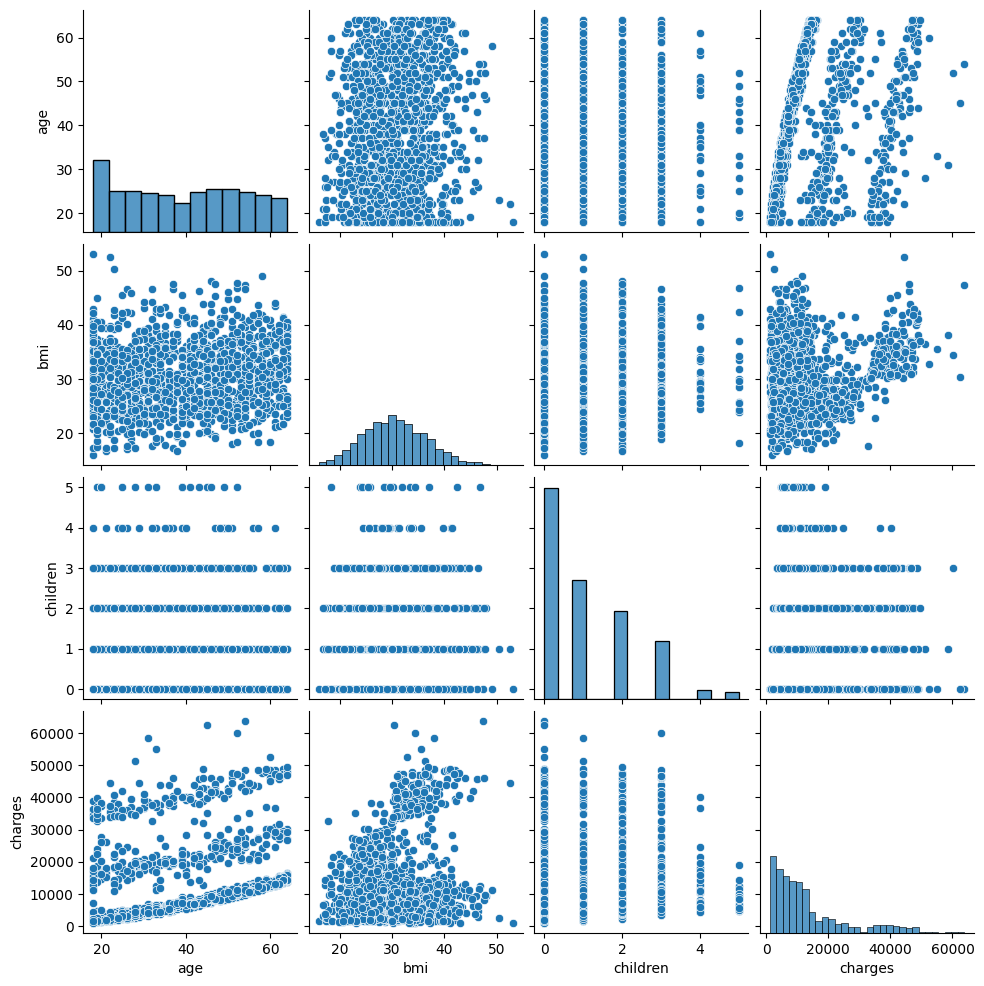

In [9]:
sns.pairplot(data)

<Axes: >

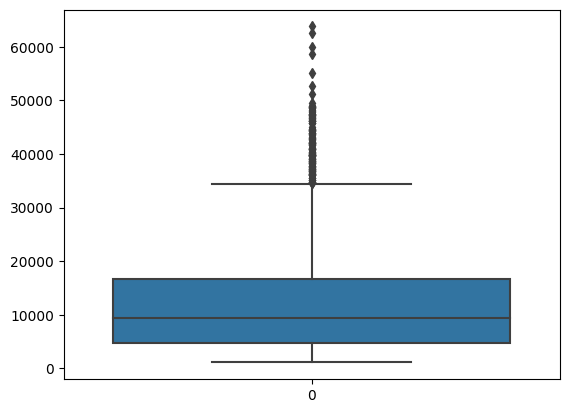

In [10]:
sns.boxplot(data.charges)

<Axes: ylabel='charges'>

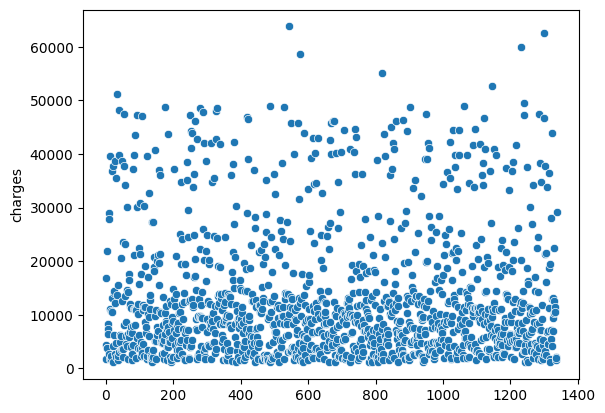

In [11]:
sns.scatterplot(data.charges)

<Axes: xlabel='region', ylabel='count'>

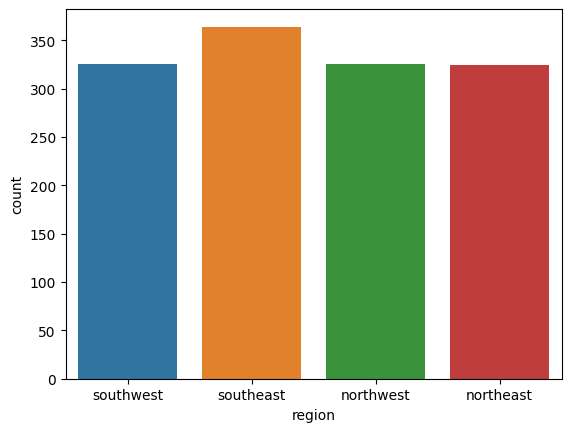

In [12]:
sns.countplot(x = "region" , data = data )

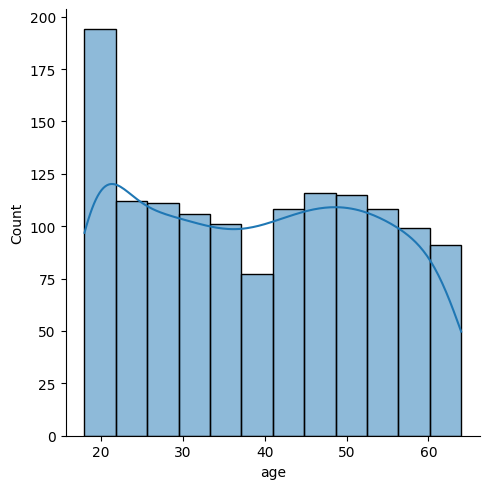

In [13]:
sns.displot(x = "age" , data = data , kde = True )

<Axes: xlabel='smoker', ylabel='count'>

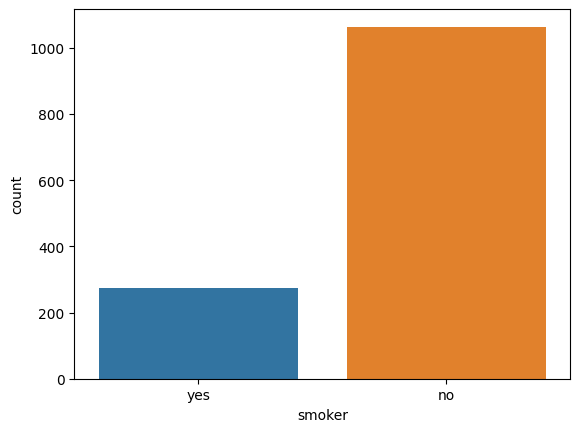

In [14]:
sns.countplot(x = "smoker" , data = data )

<Axes: xlabel='sex', ylabel='count'>

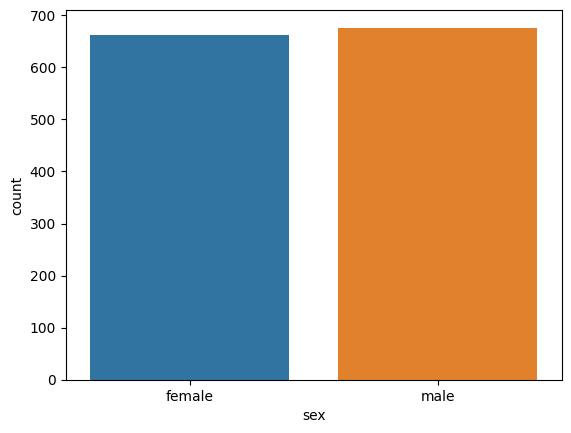

In [15]:
sns.countplot(x = "sex" , data = data )

## **Feature engineering**

In [16]:
data_one_hot = pd.get_dummies(data)

In [17]:
data_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


# **Split The Data**

In [33]:
X = data_one_hot.drop(columns="charges" , axis = 1)
y = data_one_hot["charges"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**scaling the data**

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
X_train.min()

-2.4170598053385657

In [37]:
X_train.max()

3.7363421711116276

# **Bulid The Model**

**Model 1 is the best model**

In [69]:
ann_model_1 = tf.keras.models.Sequential()

In [70]:
ann_model_1.add(tf.keras.layers.Dense(units = 10))

In [71]:
ann_model_1.add(tf.keras.layers.Dense(units = 1))

In [72]:
ann_model_1.compile(optimizer=tf.keras.optimizers.SGD() , loss = tf.keras.losses.mae , metrics = ["mae"])

In [73]:
history = ann_model_1.fit(X_train , y_train , epochs = 100 )


34/34 [==============================] - 1s 2ms/step - loss: 13345.7480 - mae: 13345.7480
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13344.9346 - mae: 13344.9346
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13343.8096 - mae: 13343.8096
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13342.0000 - mae: 13342.0000
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13338.8115 - mae: 13338.8115
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13332.8828 - mae: 13332.8828
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 13321.5713 - mae: 13321.5713
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13299.6377 - mae: 13299.6377
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 13256.8984 - mae: 13256.8984
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 13173.0840 - mae: 13

In [74]:
ann_model_1.evaluate(X_test , y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3162.4253 - mae: 3162.4253


[3162.42529296875, 3162.42529296875]

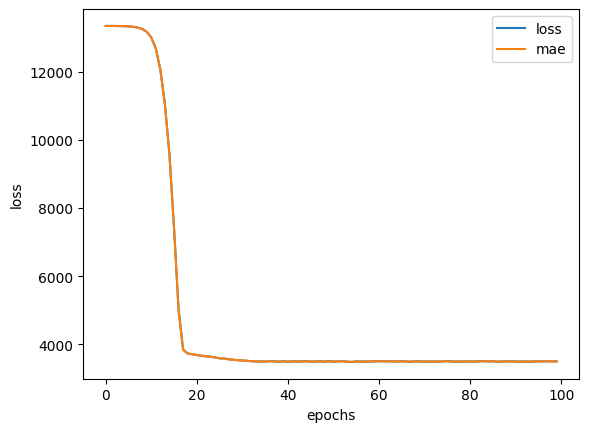

In [75]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
ann_model_2 = tf.keras.models.Sequential()
ann_model_2.add(tf.keras.layers.Dense(units=6 , activation="sigmoid"))
ann_model_2.add(tf.keras.layers.Dense(units=1 , activation="sigmoid"))
ann_model_2.compile(optimizer = tf.keras.optimizers.SGD() , loss = tf.keras.losses.mae , metrics = ["mae"])
history_2 = ann_model_2.fit(X_train , y_train , epochs = 100 )

In [49]:
ann_model_2.evaluate(X_test , y_test)

9/9 [==============================] - 0s 2ms/step - loss: 12967.3262 - mae: 12967.3262


[12967.326171875, 12967.326171875]

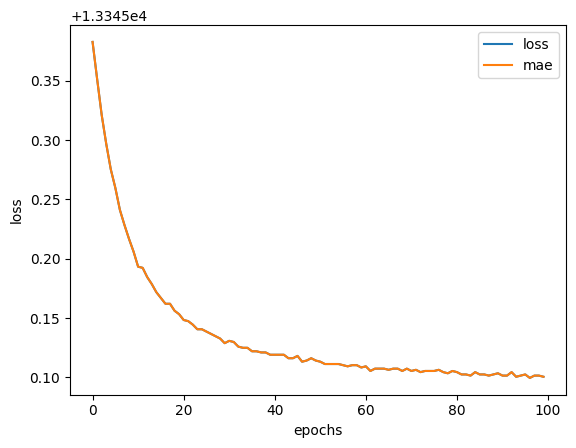

In [50]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
ann_model_3 = tf.keras.models.Sequential()
ann_model_3.add(tf.keras.layers.Dense(units=10 ))
ann_model_3.add(tf.keras.layers.Dense(units=10 ))
ann_model_3.add(tf.keras.layers.Dense(units=1 ))
ann_model_3.compile(optimizer = tf.keras.optimizers.SGD() , loss = tf.keras.losses.mae , metrics = ["mae"])
history_3 = ann_model_3.fit(X_train , y_train , epochs = 100 )

In [52]:
ann_model_3.evaluate(X_test , y_test)

9/9 [==============================] - 1s 5ms/step - loss: 4706.7383 - mae: 4706.7383


[4706.73828125, 4706.73828125]

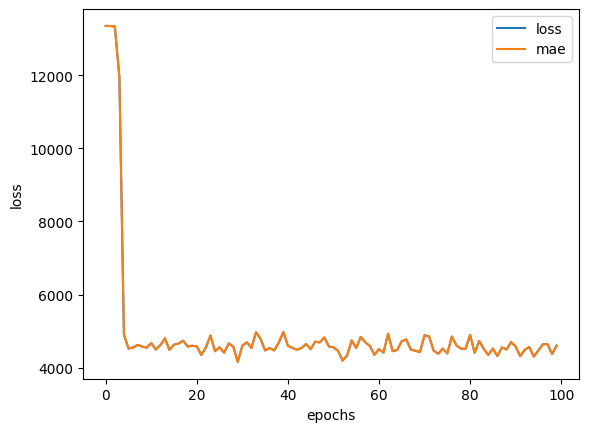

In [53]:
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
ann_model_4 = tf.keras.models.Sequential()
ann_model_4.add(tf.keras.layers.Dense(units=20 ))
ann_model_4.add(tf.keras.layers.Dense(units=1 ))
ann_model_4.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.1) , loss = tf.keras.losses.mae , metrics = ["mae"])
history_4 = ann_model_4.fit(X_train , y_train , epochs = 200 )

In [58]:
ann_model_4.evaluate(X_test , y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3875.6899 - mae: 3875.6899


[3875.68994140625, 3875.68994140625]

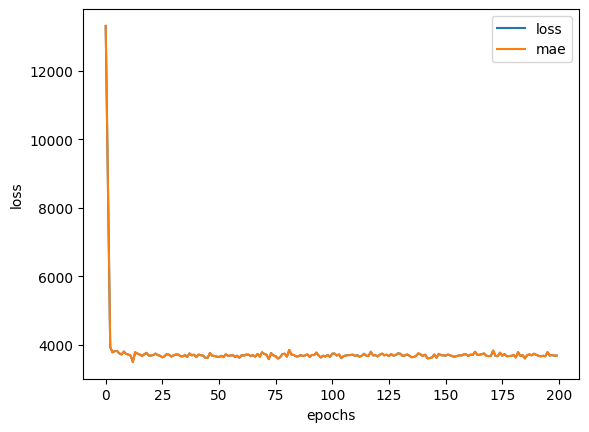

In [59]:
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
ann_model_5 = tf.keras.models.Sequential()
ann_model_5.add(tf.keras.layers.Dense(units=20 ))
ann_model_5.add(tf.keras.layers.Dense(units=1 ))
ann_model_5.compile(optimizer = tf.keras.optimizers.Adam() , loss = tf.keras.losses.mae , metrics = ["mae"])
history_5= ann_model_5.fit(X_train , y_train , epochs = 200  , batch_size=32 )

In [67]:
ann_model_5.evaluate(X_test , y_test)

9/9 [==============================] - 0s 4ms/step - loss: 11403.6123 - mae: 11403.6123


[11403.6123046875, 11403.6123046875]

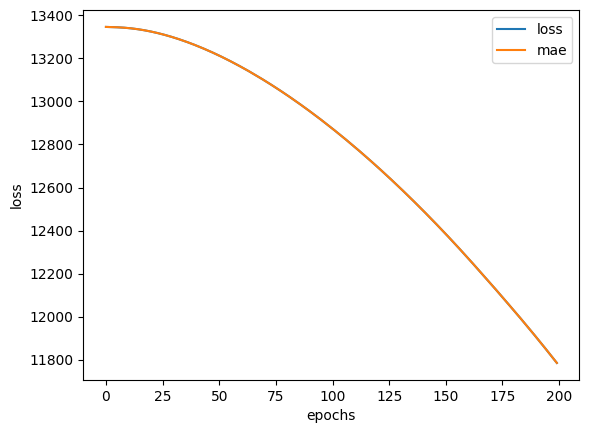

In [68]:
pd.DataFrame(history_5.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");